In [249]:
import pickle
import glob
import matplotlib.pyplot as plt

# Visualizations will be shown in the notebook.
%matplotlib inline

modelDir = 'models'
environment = 'RocketLander-v0' 

files = glob.glob(modelDir + "/" + environment + "*.h5")
episode = -1

# Get last file and episode
for f in files:
    ep = int(f.split("_",1)[1].replace(".h5", ""))
    if ep > episode:
        file = f
        episode = ep

# Read variables
with open( file.replace(".h5","") + '.pkl', 'rb') as f:
    episode, epsilon, steps, uid, reward, memory = pickle.load(f)

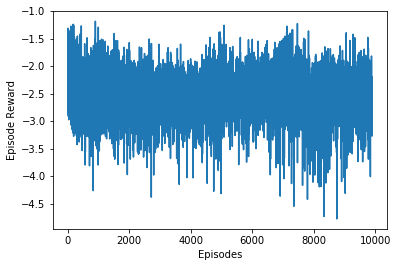

In [250]:
x = []
y = []

for each in reward:
    x.append(each[0])
    y.append(each[2])

plt.plot(x, y)
plt.xlabel('Episodes')
plt.ylabel('Episode Reward')

plt.savefig('Report/images/rewardOverEpisodesAdam.jpeg')

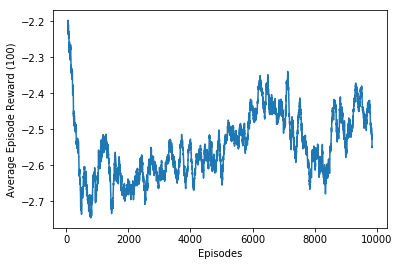

In [251]:
import numpy as np
import math

N = 100

y_mean = np.convolve(y, np.ones((N,))/N, mode='valid')

plt.plot(x[math.floor(N/2)-1:-math.ceil(N/2)], y_mean)
plt.xlabel('Episodes')
plt.ylabel('Average Episode Reward (' + str(N) + ')')

plt.savefig('Report/images/movingAverageAdam.jpeg')

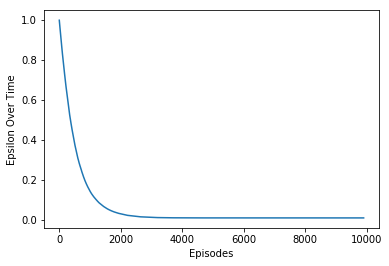

In [252]:
epsilon_start = 1.0                 # start epsilon
epsilon_end = 0.01                  # minimum epsilon
epsilon_decay = 0.00001             # speed of decay

epsilon = []
episodes = 0
for each in reward:
    episodes += each[1]
    epsilon.append(epsilon_end + (epsilon_start - epsilon_end) * math.exp(-epsilon_decay * episodes))
    
plt.plot(x, epsilon)
plt.xlabel('Episodes')
plt.ylabel('Epsilon Over Time')
plt.savefig('Report/images/Epsilon.jpeg')